In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

4422102/4422102 [==============================] - 61s 14us/step


In [3]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Створення архітектури моделі
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 58s 150ms/step - loss: 0.6223 - accuracy: 0.7679 - val_loss: 0.3895 - val_accuracy: 0.8590
Epoch 2/20
375/375 [==============================] - 56s 149ms/step - loss: 0.3894 - accuracy: 0.8574 - val_loss: 0.3384 - val_accuracy: 0.8742
Epoch 3/20
375/375 [==============================] - 56s 149ms/step - loss: 0.3325 - accuracy: 0.8791 - val_loss: 0.2914 - val_accuracy: 0.8905
Epoch 4/20
375/375 [==============================] - 56s 148ms/step - loss: 0.2911 - accuracy: 0.8941 - val_loss: 0.2687 - val_accuracy: 0.9012
Epoch 5/20
375/375 [==============================] - 57s 151ms/step - loss: 0.2666 - accuracy: 0.9026 - val_loss: 0.2661 - val_accuracy: 0.8996
Epoch 6/20
375/375 [==============================] - 57s 153ms/step - loss: 0.2448 - accuracy: 0.9107 - val_loss: 0.2462 - val_accuracy: 0.9092
Epoch 7/20
375/375 [==============================] - 57s 152ms/step - loss: 0.2286 - accuracy: 0.9168 - val_loss: 0.2564 - val_ac

In [9]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 6s 18ms/step - loss: 0.3198 - accuracy: 0.9156
Test accuracy: 0.9156000018119812


In [10]:
# Виведення графіків навчання
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

<Figure size 640x480 with 0 Axes>

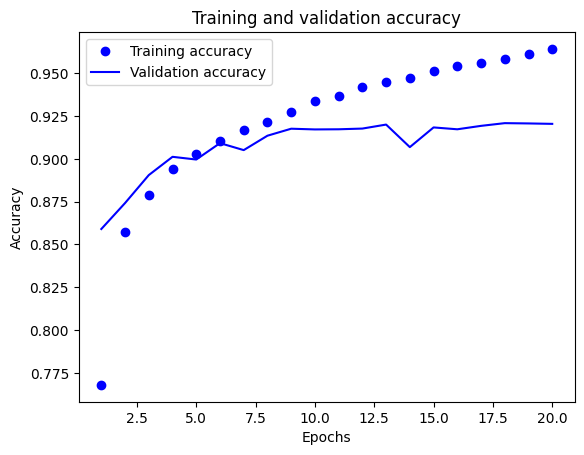

<Figure size 640x480 with 0 Axes>

In [11]:
# Графік точності
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

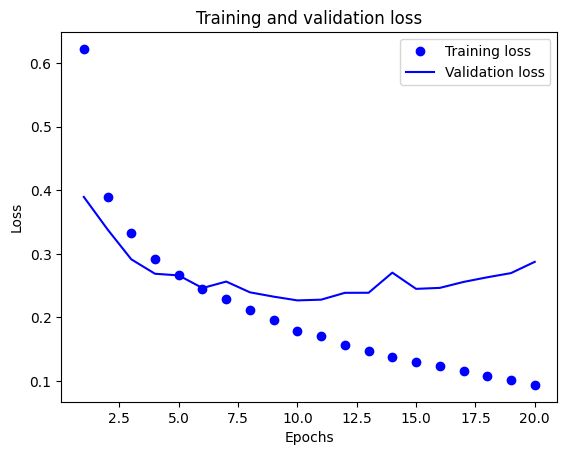

In [12]:
# Графік втрат
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
# Отримання прогнозів для тестових даних
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(test_labels, axis=1).numpy()

313/313 [==============================] - 6s 18ms/step


In [14]:
# Виведення метрик якості для кожного класу
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.88      0.88      1000
           3       0.87      0.95      0.91      1000
           4       0.88      0.86      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.77      0.76      1000
           7       0.93      0.99      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.94      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

